In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)


In [2]:
#read files
# read the sp500 data
df_sp=pd.read_csv("../data/2021-12-06_Top25 SP500 daily.csv")
df_sp.head()

gvkey  iid  datadate    tic      cusip                         conm  div  \
0   1045    1  20100104  AAMRQ  001765106  AMERICAN AIRLINES GROUP INC  NaN   
1   1045    1  20100105  AAMRQ  001765106  AMERICAN AIRLINES GROUP INC  NaN   
2   1045    1  20100106  AAMRQ  001765106  AMERICAN AIRLINES GROUP INC  NaN   
3   1045    1  20100107  AAMRQ  001765106  AMERICAN AIRLINES GROUP INC  NaN   
4   1045    1  20100108  AAMRQ  001765106  AMERICAN AIRLINES GROUP INC  NaN   

   divd  dvrated  divsppaydate curcdd        cshoc      cshtrd   eps  prccd  \
0   NaN      NaN           NaN    USD  332456000.0  17441530.0 -4.98   7.72   
1   NaN      NaN           NaN    USD  332456000.0  24044700.0 -4.98   8.36   
2   NaN      NaN           NaN    USD  332456000.0  15770140.0 -4.98   8.11   
3   NaN      NaN           NaN    USD  332456000.0  17663110.0 -4.98   8.25   
4   NaN      NaN           NaN    USD  332456000.0  12413430.0 -4.98   8.11   

   prchd  prcld  prcod  prcstd  exchg secstat   cik  \
0   7.79   7.45   7.73     3.0     19       I  6201   
1   8.42   7.68   7.68     3.0     19       I  6201   
2   8.31   8.01   8.11     3.0     19       I  6201   
3   8.50   8.05   8.05     3.0     19       I  6201   
4   8.42   7.97   8.34     3.0     19       I  6201   

                         conml   naics   sic  spcindcd  stko  
0  American Airlines Group Inc  481111  4512     605.0     0  
1  American Airlines Group Inc  481111  4512     605.0     0  
2  American Airlines Group Inc  481111  4512     605.0     0  
3  American Airlines Group Inc  481111  4512     605.0     0  
4  American Airlines Group Inc  481111  4512     605.0     0

In [3]:
df_sp.dtypes

gvkey             int64
iid               int64
datadate          int64
tic              object
cusip            object
conm             object
div             float64
divd            float64
dvrated         float64
divsppaydate    float64
curcdd           object
cshoc           float64
cshtrd          float64
eps             float64
prccd           float64
prchd           float64
prcld           float64
prcod           float64
prcstd          float64
exchg             int64
secstat          object
cik               int64
conml            object
naics             int64
sic               int64
spcindcd        float64
stko              int64
dtype: object

In [4]:
df_sp["datadate"] = pd.to_datetime(df_sp["datadate"].astype(str), format='%Y%m%d')

In [5]:
#length of the csv file
print("Length of the csv file:", len(df_sp))
print("Timeframe: From ", df_sp.datadate.min(), "---To ", df_sp.datadate.max())

Length of the csv file: 176222
Timeframe: From  2010-01-04 00:00:00 ---To  2021-12-03 00:00:00


In [49]:
print("Amount of tic: ", len(df_sp.tic.unique()), "--- Amount of tic NaN: " ,df_sp.tic.isnull().sum())
print("Amount of conm", len(df_sp.conm.unique()), "--- Amount of conm NaN: " ,df_sp.conm.isnull().sum())
print("----")
print("Amount of cusip: ", len(df_sp.cusip.unique()), "--- Amount of cusip NaN: " ,df_sp.cusip.isnull().sum())
print("Amount of gvkey: ", len(df_sp.gvkey.unique()), "--- Amount of gvkey NaN: " ,df_sp.gvkey.isnull().sum())
print("Amount of iid: ", len(df_sp.iid.unique()), "--- Amount of iid NaN: " ,df_sp.iid.isnull().sum())

Amount of tic:  82 --- Amount of tic NaN:  0
Amount of conm 51 --- Amount of conm NaN:  0
----
Amount of cusip:  82 --- Amount of cusip NaN:  0
Amount of gvkey:  51 --- Amount of gvkey NaN:  0
Amount of iid:  14 --- Amount of iid NaN:  0


In [50]:
print ("Amount of NaN: Closed price:", df_sp.prccd.isnull().sum())
print ("Amount of NaN: Open price:", df_sp.prcod.isnull().sum())
print ("Amount of NaN: Price High daily:", df_sp.prchd.isnull().sum())
print ("Amount of NaN: Low Daily price:", df_sp.prcld.isnull().sum())
print ("Amount of NaN: Standard deviation price:", df_sp.prcstd.isnull().sum())

Amount of NaN: Closed price: 5
Amount of NaN: Open price: 2637
Amount of NaN: Price High daily: 5
Amount of NaN: Low Daily price: 5
Amount of NaN: Standard deviation price: 5


In [43]:
df_sp.cusip.nunique()

82

In [40]:
# Amount of unique tics per Conm 
# 1 Conm -- n tic
# 1 tic - 1 conm
print(df_sp.groupby(df_sp["conm"])["tic"].nunique())
print ("Summe = " ,df_sp.groupby(df_sp["conm"])["tic"].nunique().sum())

conm
3M CO                           1
ABBOTT LABORATORIES             1
ABBVIE INC                      1
ABIOMED INC                     1
ACCENTURE PLC                   1
ACTIVISION BLIZZARD INC         1
ADOBE INC                       1
ADVANCE AUTO PARTS INC          1
ADVANCED MICRO DEVICES          1
AES CORP (THE)                  2
AFLAC INC                       1
AGILENT TECHNOLOGIES INC        1
AIR PRODUCTS & CHEMICALS INC    1
AKAMAI TECHNOLOGIES INC         1
ALASKA AIR GROUP INC            1
ALBEMARLE CORP                  1
ALEXANDRIA R E EQUITIES INC     4
ALIGN TECHNOLOGY INC            1
ALLEGION PLC                    1
ALLIANT ENERGY CORP             1
ALLSTATE CORP                   9
ALPHABET INC                    2
ALTRIA GROUP INC                1
AMAZON.COM INC                  1
AMCOR PLC                       2
AMEREN CORP                     1
AMERICAN AIRLINES GROUP INC     4
AMERICAN ELECTRIC POWER CO      4
AMERICAN EXPRESS CO             1
AMERICAN 

In [42]:
# unique tics and unique conm
print (df_sp.tic.unique())
print (df_sp.conm.unique())

['AAMRQ' 'AAR' 'AAL' 'AALCP' 'ABT' 'AMD' 'APD' 'ALK' 'AEP' 'AEP.PA'
 'AEPPL' 'AEPPZ' 'AXP' 'AFL' 'AIG' 'AIG.PA.1' 'AIG.WS' 'AIG.PA' 'AME'
 'AMGN' 'ADI' 'APA' 'APA.PD' 'AAPL' 'AMAT' 'ADM' 'ADM.PA' 'AON' 'AJG'
 'IBM' 'MMM' 'MO' '5050B' 'AOS' 'AEE' 'LNT' 'MSFT' 'ADBE' 'ABMD' 'APH'
 'ABBV' 'ANET' 'AES' 'AESC' 'ALL' 'ALL.PA' 'ALL.PC' 'ALL.PD' 'ALL.PE'
 'ALL.PF' 'ALL.PG' 'ALL.PH' 'ALL.PI' 'ALB' 'ABC' 'ANSS' 'AMZN' 'ARE'
 'ARE.PC' 'ARE.PD' 'ARE.PE' 'AMCR' 'AMCO30' 'AMT' 'AMT.PA' 'AMT.PB' 'APTV'
 'APTV.PA' 'AKAM' 'A' 'ALGN' 'ACN' 'ANTM' 'ANTX' 'AAP' 'GOOGL' 'GOOG'
 'AMP' 'AMP.PA' 'AWK' 'ATVI' 'ALLE']
['AMERICAN AIRLINES GROUP INC' 'ABBOTT LABORATORIES'
 'ADVANCED MICRO DEVICES' 'AIR PRODUCTS & CHEMICALS INC'
 'ALASKA AIR GROUP INC' 'AMERICAN ELECTRIC POWER CO' 'AMERICAN EXPRESS CO'
 'AFLAC INC' 'AMERICAN INTERNATIONAL GROUP' 'AMETEK INC' 'AMGEN INC'
 'ANALOG DEVICES' 'APA CORP' 'APPLE INC' 'APPLIED MATERIALS INC'
 'ARCHER-DANIELS-MIDLAND CO' 'AON PLC' 'ARTHUR J GALLAGHER & CO'
 'INTL BUSINESS 

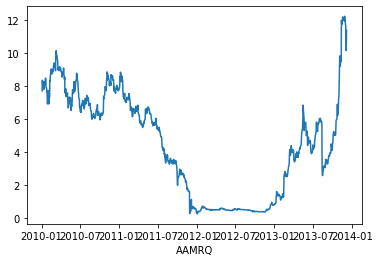

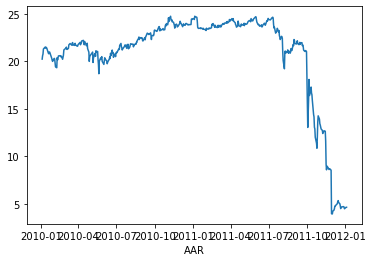

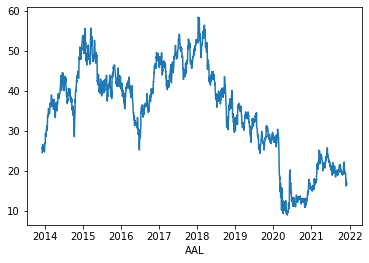

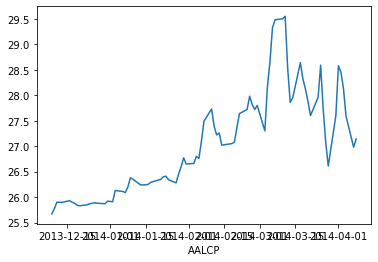

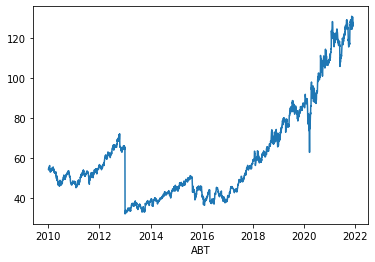

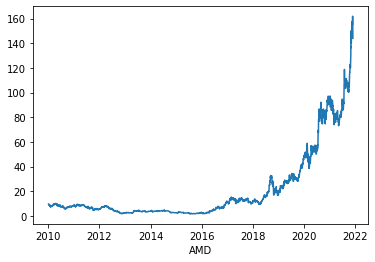

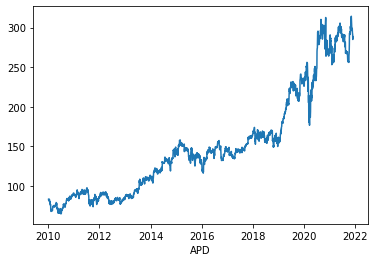

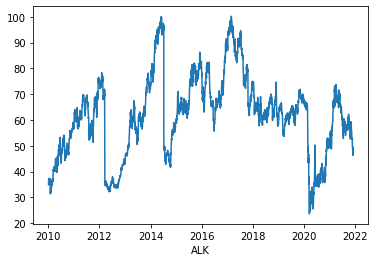

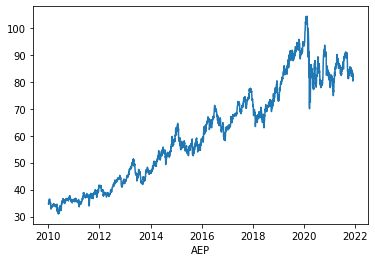

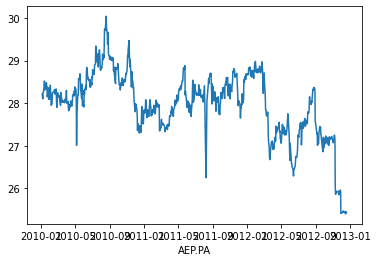

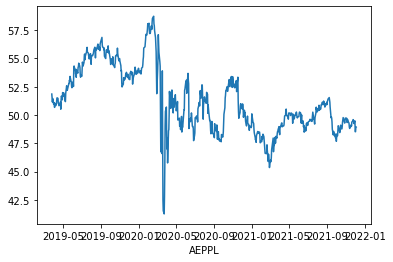

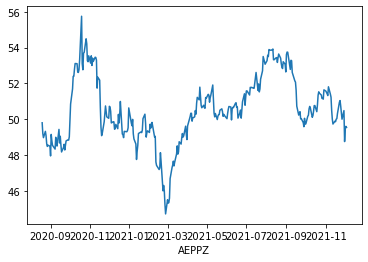

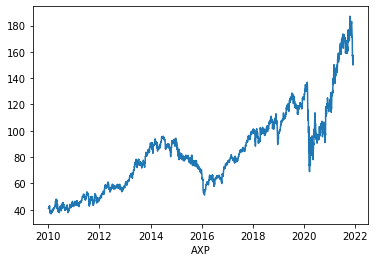

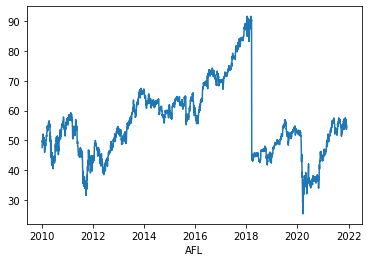

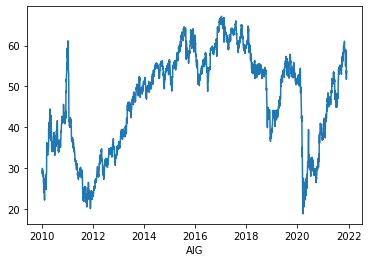

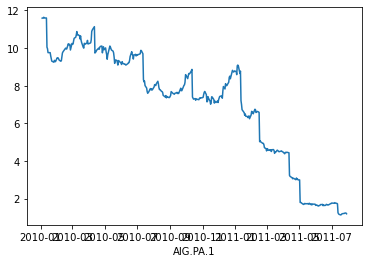

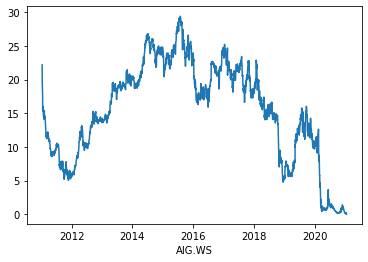

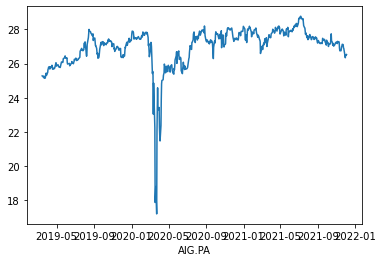

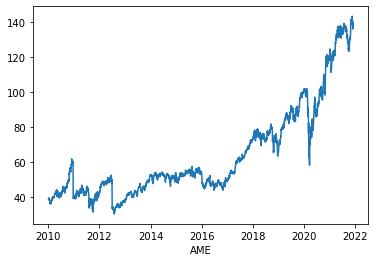

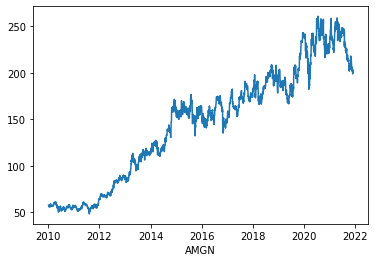

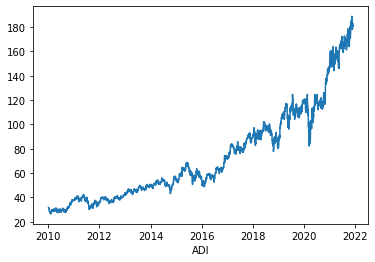

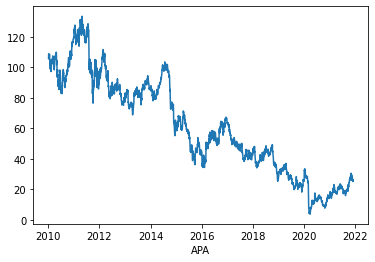

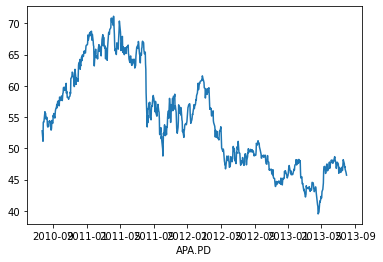

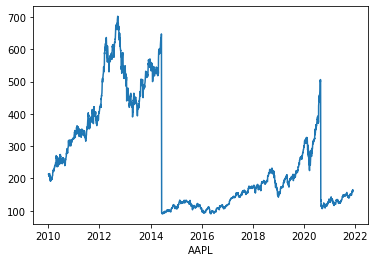

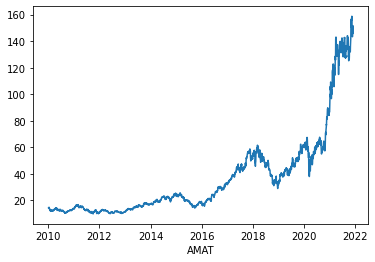

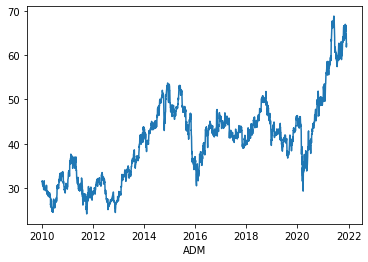

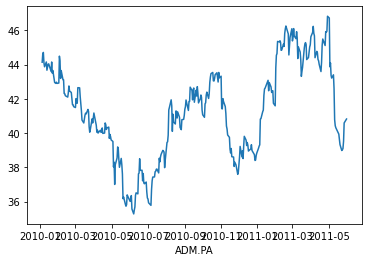

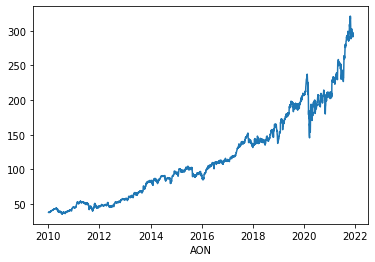

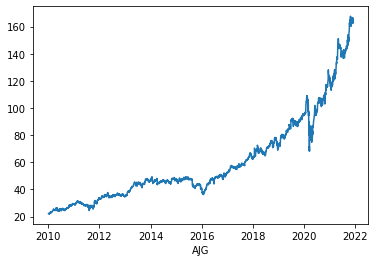

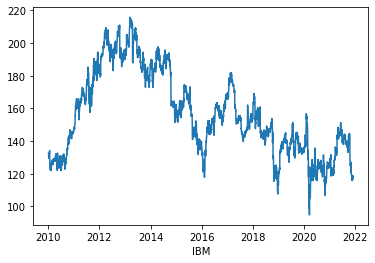

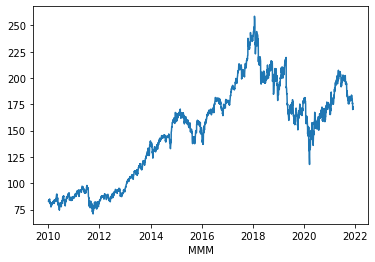

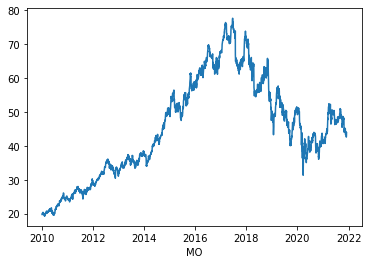

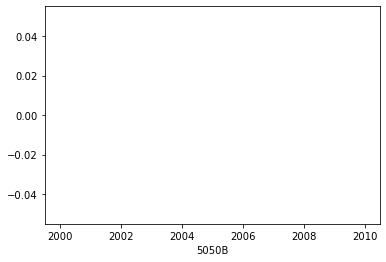

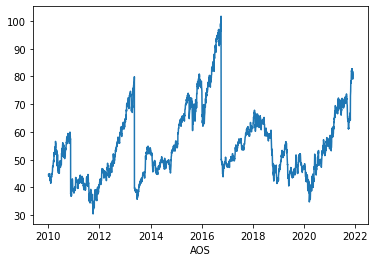

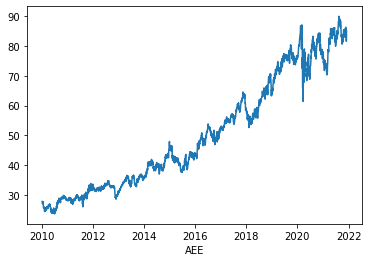

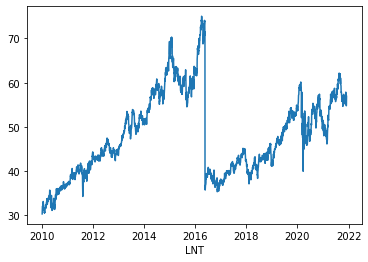

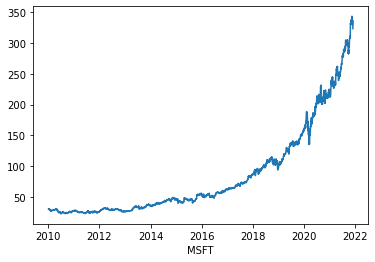

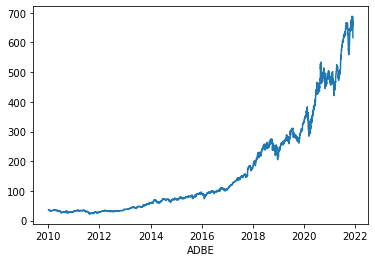

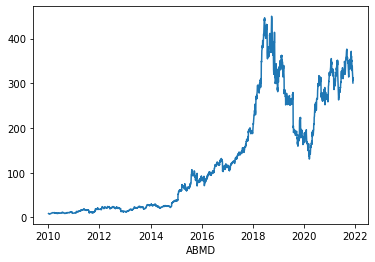

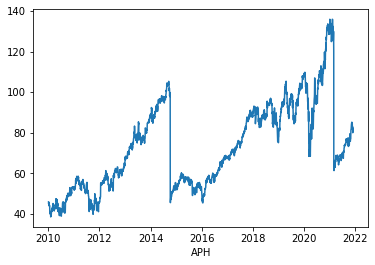

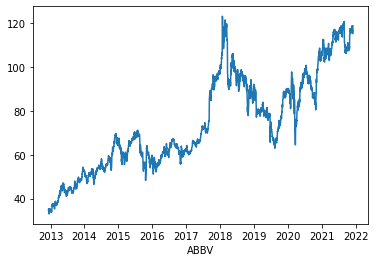

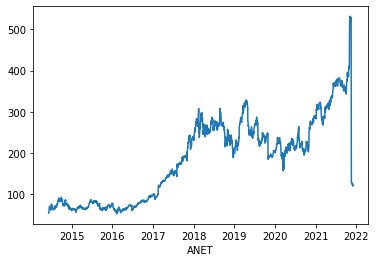

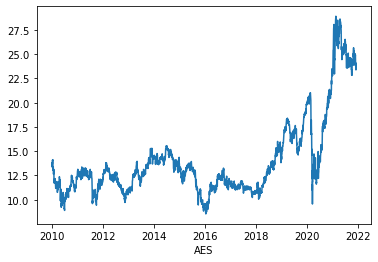

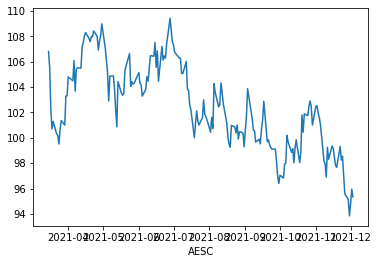

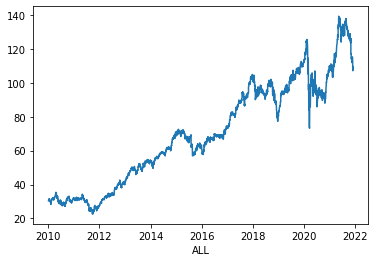

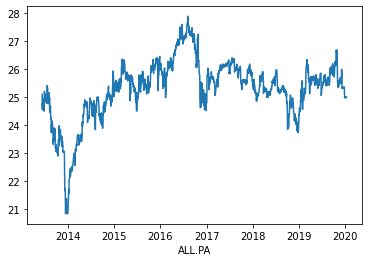

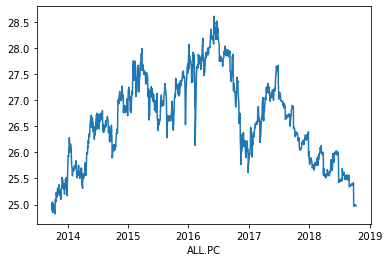

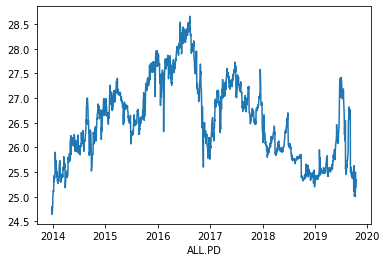

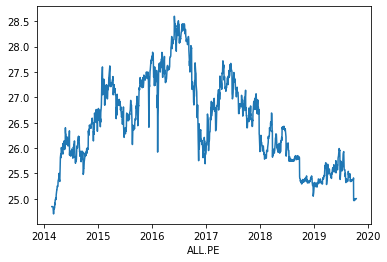

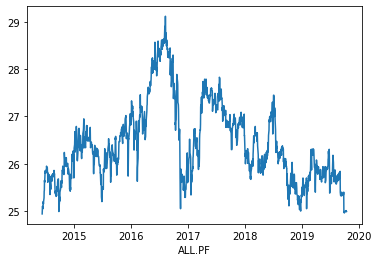

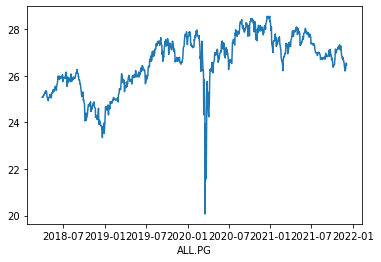

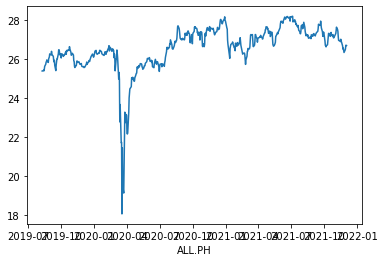

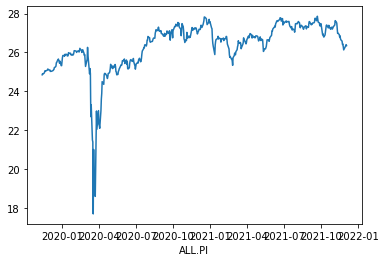

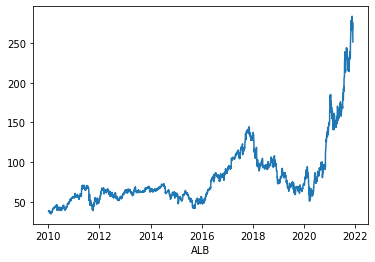

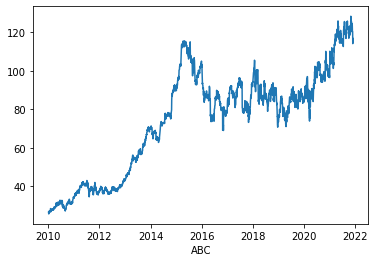

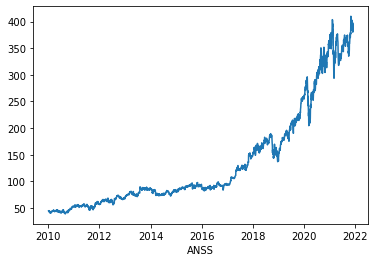

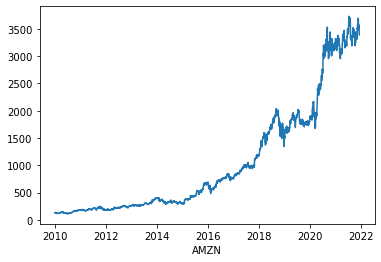

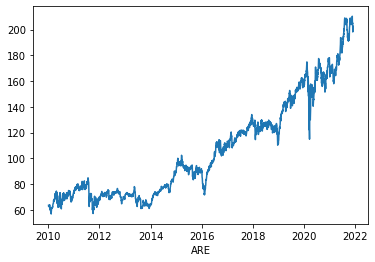

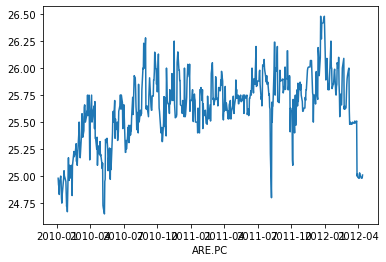

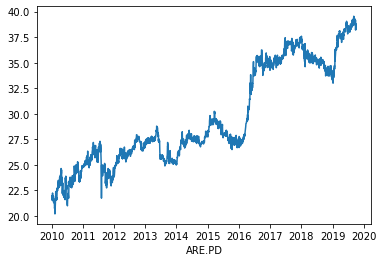

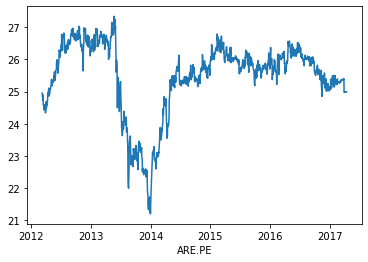

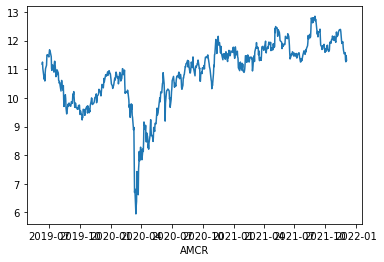

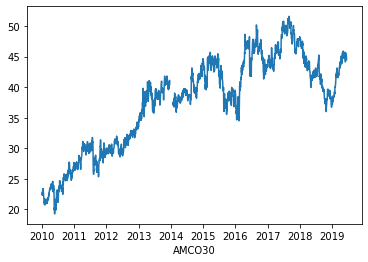

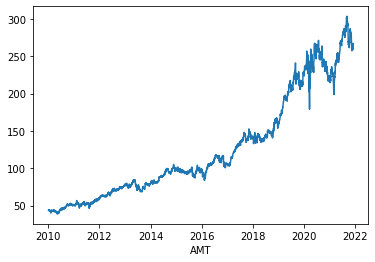

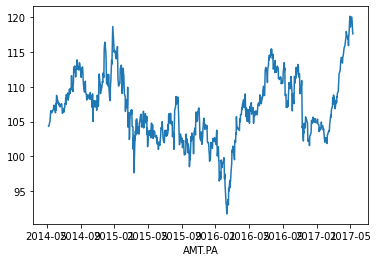

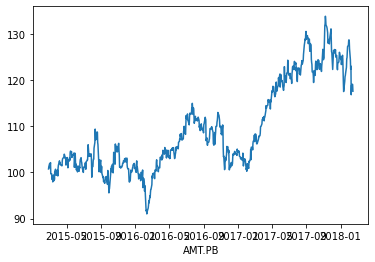

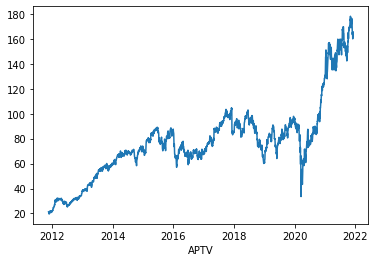

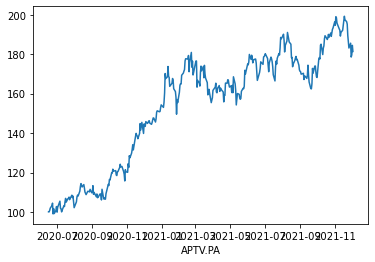

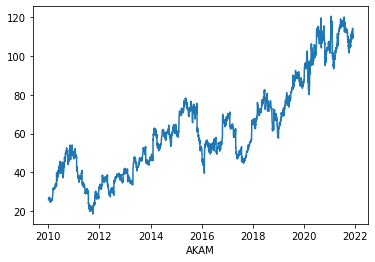

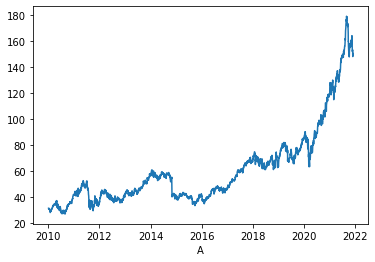

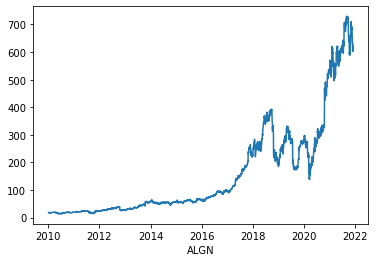

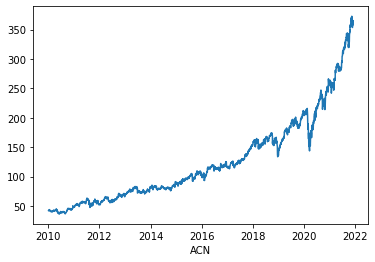

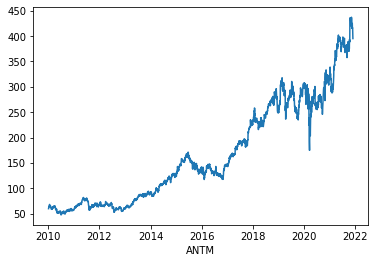

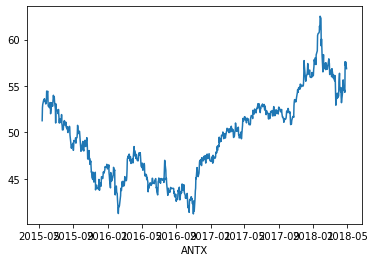

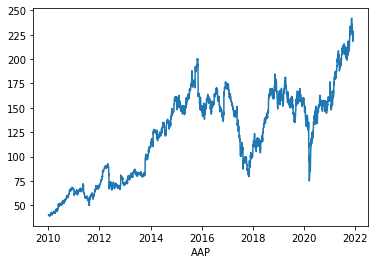

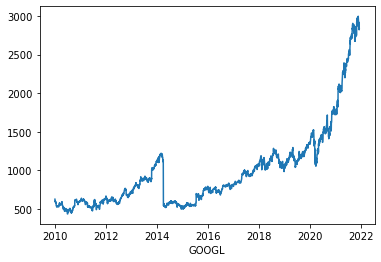

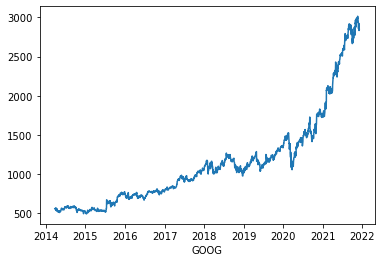

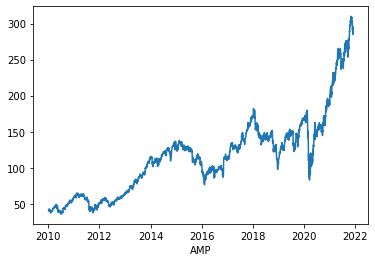

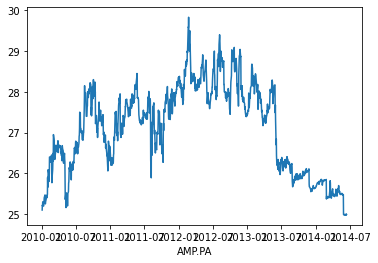

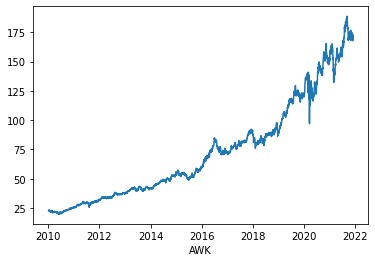

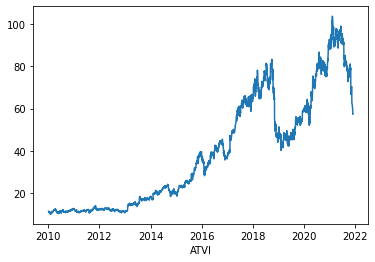

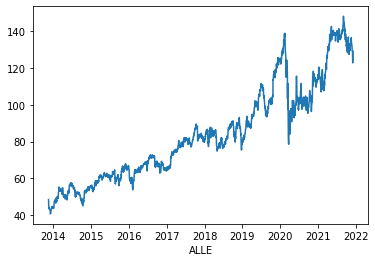

In [16]:
# Closed Price all tics (len(tic)=82)
for tic in df_sp.tic.unique():
    df=df_sp[df_sp["tic"]==tic]
    plt.figure()
    plt.plot(df["datadate"], df["prccd"])
    plt.xlabel(tic)
    plt.show()

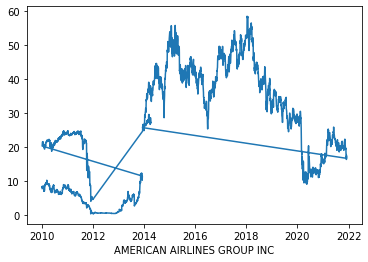

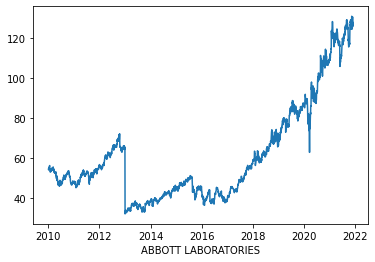

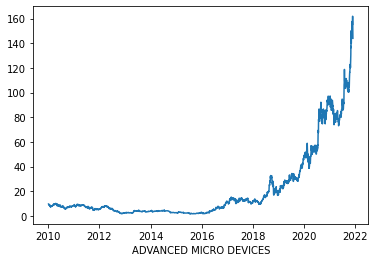

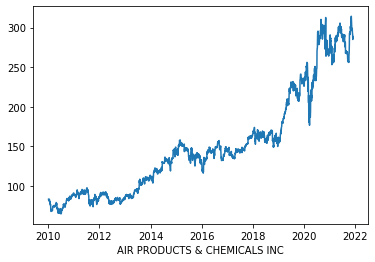

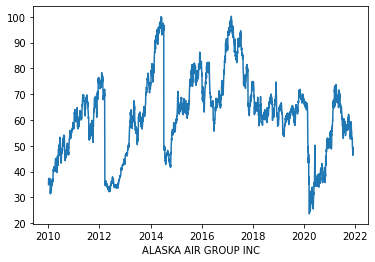

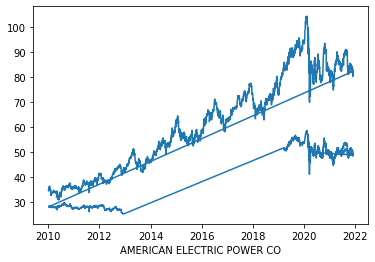

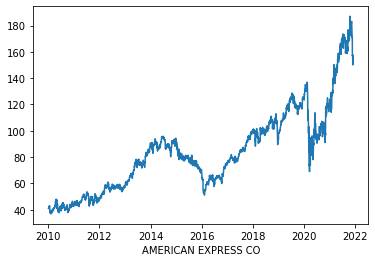

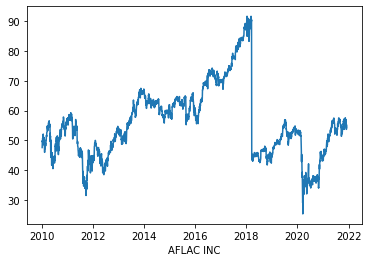

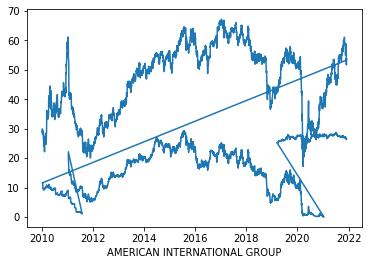

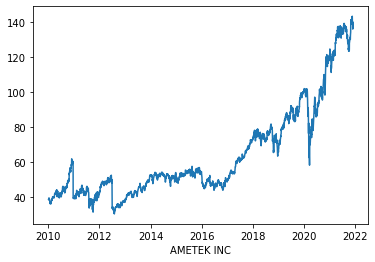

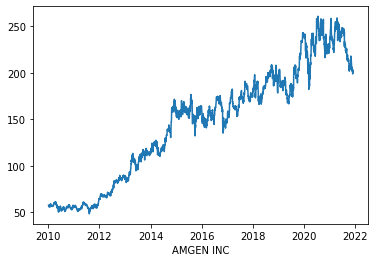

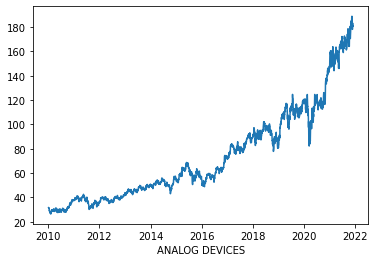

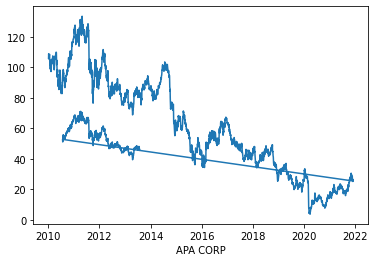

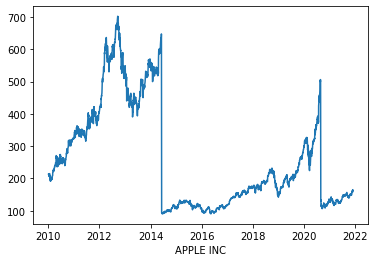

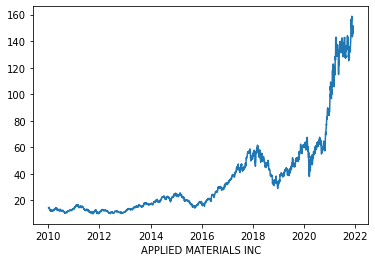

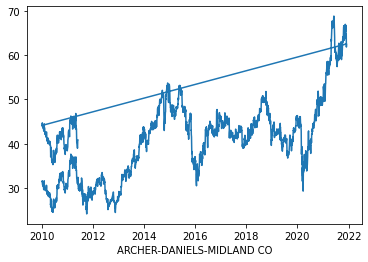

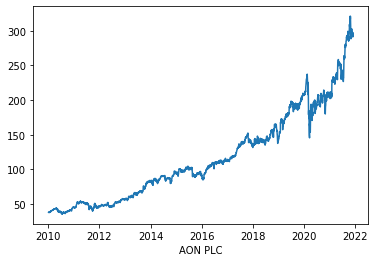

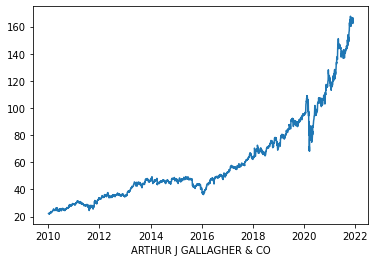

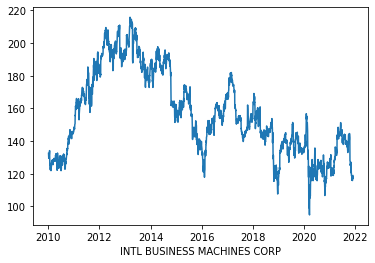

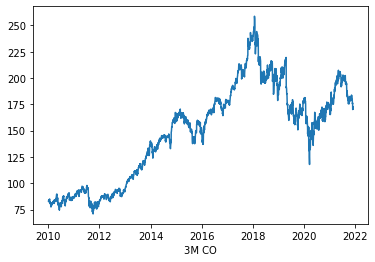

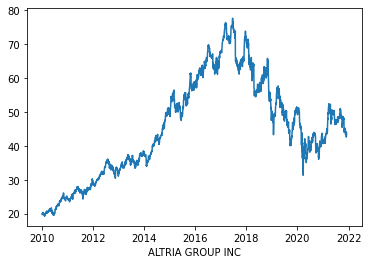

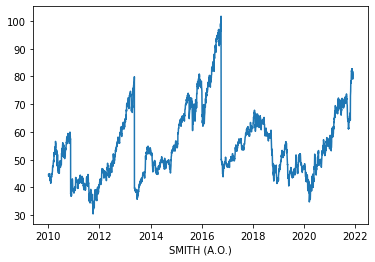

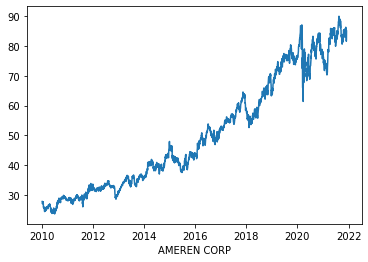

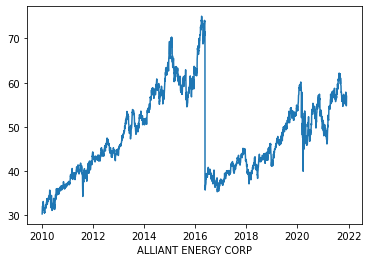

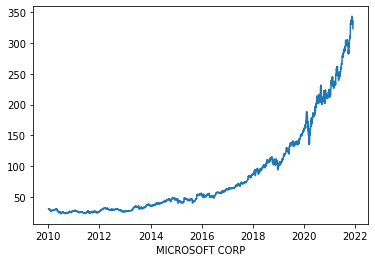

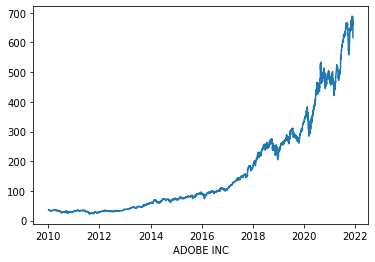

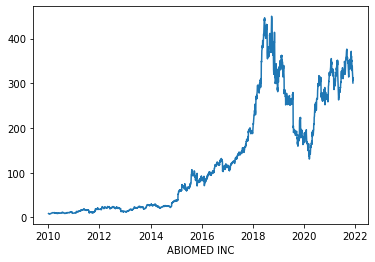

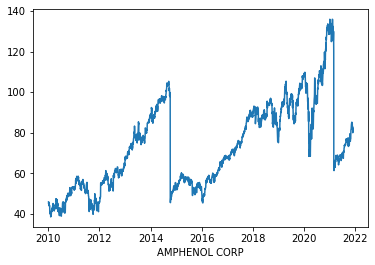

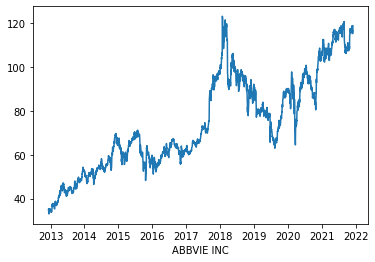

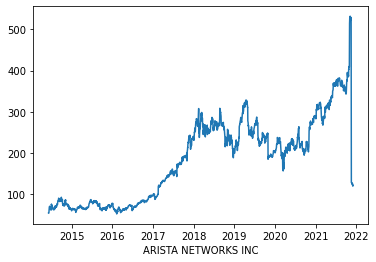

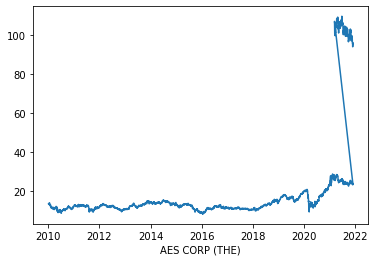

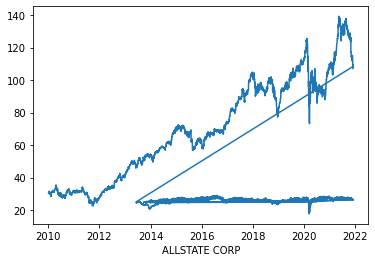

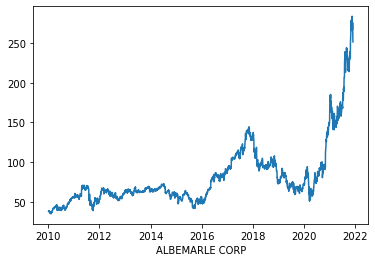

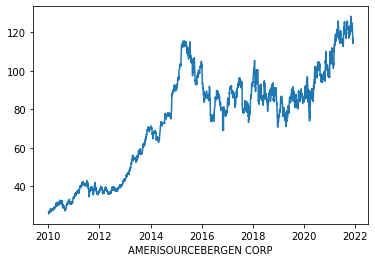

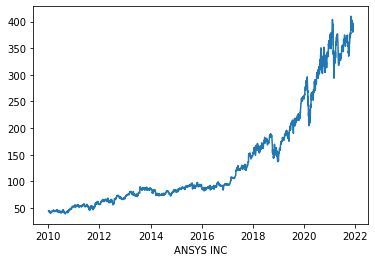

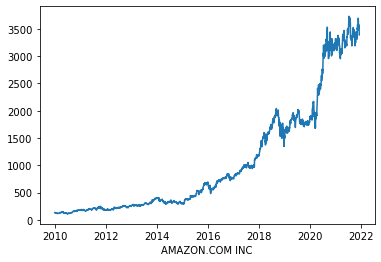

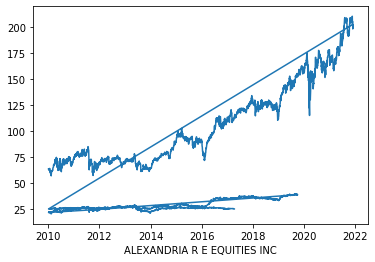

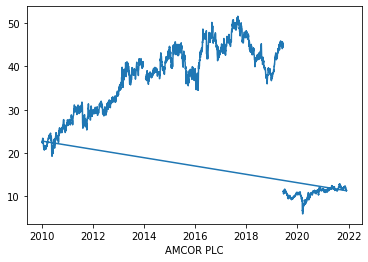

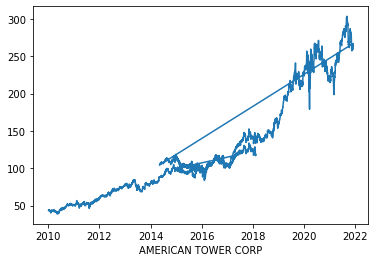

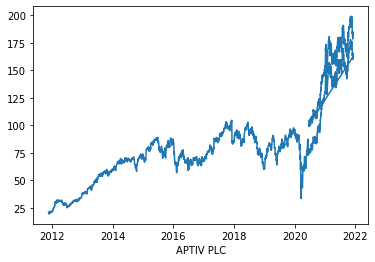

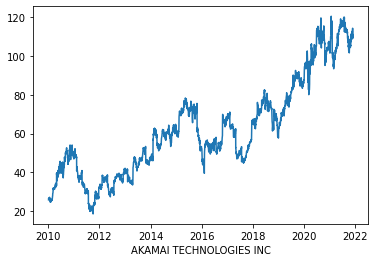

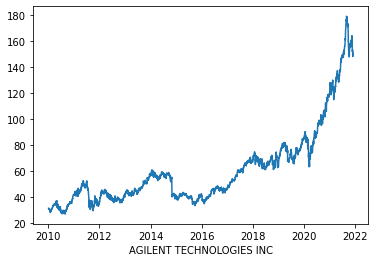

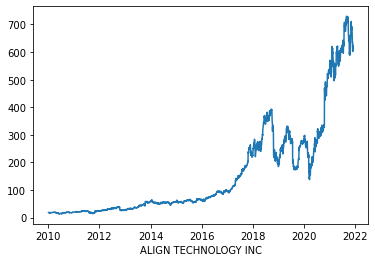

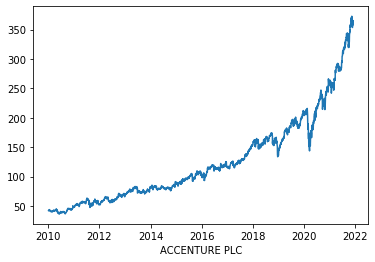

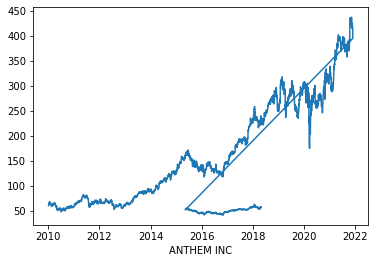

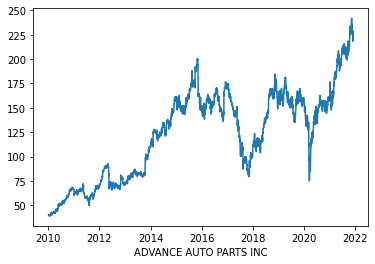

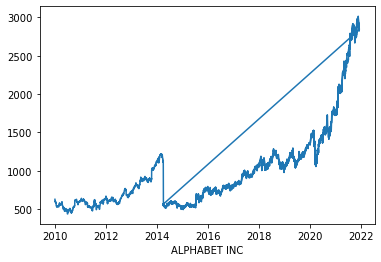

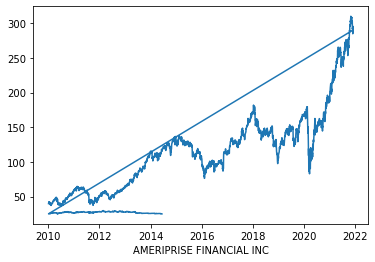

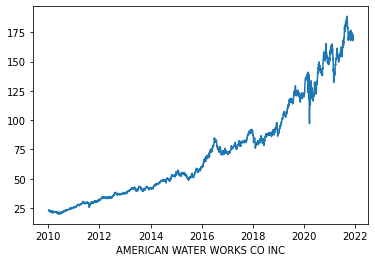

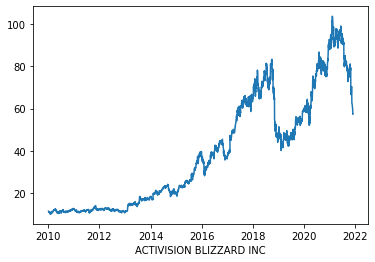

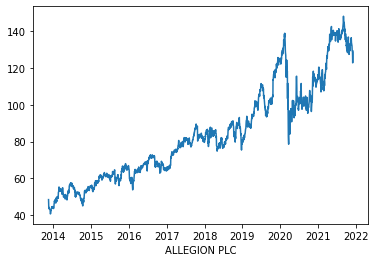

In [18]:
# Closed Price for all conm (len(conm)=51)
for conm in df_sp.conm.unique():
    df=df_sp[df_sp["conm"]==conm]
    plt.figure()
    plt.plot(df["datadate"], df["prccd"])
    plt.xlabel(conm)
    plt.show()

# Abnormalities in the Data...

Potential important Columns for us are: 
- *conm, tic, gvkey, cusip*
- *prccd, prchd, prcod, prcld, prcstd*

1. NaN
    - *tic, conm, cusip, gvkey*:  Seems to be clear, no NaNs
    - All price columns 5 NaN except  **open price 2637 !!!!!
  
2. Vis
    - tic: 5050B is a tic ??? + rest seems clear but not every tic in whole timeframe available
    - conm: Visualisation is chaos + not all in complete timeframe (e.g ABBVIE INC) 

# EuroStoxx Data

In [2]:
df_es=pd.read_csv("../data/2021-12-06_Top25 Euro Stoxx daily.csv")

C:\Users\Rahim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_es

gvkey  iid  datadate                    conm curcdd         cshoc  \
0         8546  01W  20100104  KONINKLIJKE PHILIPS NV    EUR  9.724118e+08   
1         8546  01W  20100105  KONINKLIJKE PHILIPS NV    EUR  9.724118e+08   
2         8546  01W  20100106  KONINKLIJKE PHILIPS NV    EUR  9.724118e+08   
3         8546  01W  20100107  KONINKLIJKE PHILIPS NV    EUR  9.724118e+08   
4         8546  01W  20100108  KONINKLIJKE PHILIPS NV    EUR  9.724118e+08   
...        ...  ...       ...                     ...    ...           ...   
481270  333645  02W  20211129               PROSUS NV    EUR  2.073644e+09   
481271  333645  02W  20211130               PROSUS NV    EUR  2.073644e+09   
481272  333645  02W  20211201               PROSUS NV    EUR  2.073644e+09   
481273  333645  02W  20211202               PROSUS NV    EUR  2.073644e+09   
481274  333645  02W  20211203               PROSUS NV    EUR  2.073644e+09   

           cshtrd   prccd   prchd  prcld  prcstd  split splitf          isin  \
0       4154697.0  21.495  21.520  20.82    10.0    NaN    NaN  NL0000009538   
1       4535550.0  21.450  21.685  21.30    10.0    NaN    NaN  NL0000009538   
2       4496385.0  21.120  21.430  20.97    10.0    NaN    NaN  NL0000009538   
3       4573449.0  21.000  21.200  20.78    10.0    NaN    NaN  NL0000009538   
4       4204274.0  21.030  21.300  20.79    10.0    NaN    NaN  NL0000009538   
...           ...     ...     ...    ...     ...    ...    ...           ...   
481270  2027368.0  70.680  72.190  70.36    10.0    NaN    NaN  NL0013654783   
481271  3591469.0  70.920  72.000  69.73    10.0    NaN    NaN  NL0013654783   
481272  2359507.0  74.630  74.710  72.05    10.0    NaN    NaN  NL0013654783   
481273  3354229.0  72.300  73.750  71.50    10.0    NaN    NaN  NL0013654783   
481274  3392809.0  70.260  72.100  69.77    10.0    NaN    NaN  NL0013654783   

                         conml  county   naics   sic  
0       Koninklijke Philips NV     NaN  334510  3845  
1       Koninklijke Philips NV     NaN  334510  3845  
2       Koninklijke Philips NV     NaN  334510  3845  
3       Koninklijke Philips NV     NaN  334510  3845  
4       Koninklijke Philips NV     NaN  334510  3845  
...                        ...     ...     ...   ...  
481270               Prosus NV     NaN  454110  5961  
481271               Prosus NV     NaN  454110  5961  
481272               Prosus NV     NaN  454110  5961  
481273               Prosus NV     NaN  454110  5961  
481274               Prosus NV     NaN  454110  5961  

[481275 rows x 18 columns]

In [16]:
df_es["isin"].unique()

array(['NL0000009538', nan, 'ES0113900J37', 'BRBSANBDR002',
       'FR0000121014', 'FR0010979351', 'FR0012370310', 'FR0013227725',
       'US5024413065', 'ES0113211835', 'ES0613211913', 'IE0001827041',
       'IE0001827264', 'IE0001827603', 'US12626K2033', 'FR0000140063',
       'FR0000131104', 'NL0011821202', 'DE0008430026', 'DE0008404005',
       'DE000A1R1EB2', 'IT0000072618', 'IT0000072626', 'DE000BASF111',
       'FR0000120644', 'US23636T1007', 'DE0007100000', 'DE000A1E9CD0',
       'DE000A1RFHV0', 'DE000A0LR9K1', 'US2338251083', 'DE0007236101',
       'DE0007236002', 'NL0011794037', 'FR0000120271', 'BE0005554259',
       'FR0010697359', 'FR0010412437', 'IE00BZ12WP82', 'NL0010273215',
       'USN070592100', 'IT0003132476', 'FR0000120628', 'FR0012420313',
       'DE0005190003', 'DE0005190037', 'DE000BAY0017', 'FR0000120321',
       'NL0000005437', 'DE0007664005', 'DE0007664039', 'DE000A1R1C65',
       'US9286623031', 'ES0144580Y14', 'ES0144580X15', 'ES0644580930',
       'FI0009013

In [4]:
df_es["datadate"] = pd.to_datetime(df_es["datadate"].astype(str), format='%Y%m%d')

In [8]:
#length of the csv file
print("Length of the csv file:", len(df_es))
print("Timeframe: From ", df_es.datadate.min(), "---To ", df_es.datadate.max())

Length of the csv file: 481275
Timeframe: From  2010-01-01 00:00:00 ---To  2021-12-03 00:00:00


In [11]:
print(df_es["conm"].unique())
print(df_es["conm"].nunique())

['KONINKLIJKE PHILIPS NV' 'BANCO SANTANDER SA'
 'LVMH MOET HENNESSY LOUIS V' 'BBVA' 'CRH PLC' 'BNP PARIBAS'
 'ING GROEP NV' 'MUNICH RE CO' 'ALLIANZ SE' 'INTESA SANPAOLO SPA'
 'BASF SE' 'DANONE SA' 'DAIMLER AG' 'SIEMENS AG'
 'KONINKLIJKE AHOLD DELHAIZE' 'TOTALENERGIES SE' 'LINDE PLC'
 'ASML HOLDING NV' 'ENI SPA' 'AXA SA' 'BAYER MOTOREN WERKE AG' 'BAYER AG'
 "L'OREAL SA" 'VOLKSWAGEN AG' 'IBERDROLA SA' 'KONE OYJ' "L'AIR LIQUIDE SA"
 'SANOFI' 'ESSILORLUXOTTICA' 'VIVENDI SE' 'STELLANTIS NV' 'SAFRAN SA'
 'SCHNEIDER ELECTRIC SA' 'PERNOD RICARD SA' 'VINCI SA' 'SAP SE'
 'INFINEON TECHNOLOGIES AG' 'ENEL SPA' 'AIRBUS SE' 'ADIDAS AG'
 'DEUTSCHE TELEKOM' 'KERING' 'DEUTSCHE POST AG' 'ANHEUSER-BUSCH INBEV'
 'FLUTTER ENTERTAINMENT PLC' 'DEUTSCHE BOERSE AG'
 'IND DE DISENO TEXTIL SA' 'VONOVIA SE' 'ADYEN N.V' 'PROSUS NV']
50


In [13]:
print ("Amount of NaN: Closed price:", df_es.prccd.isnull().sum())
# print ("Amount of NaN: Open price:", df_es.prcod.isnull().sum())
print ("Amount of NaN: Price High daily:", df_es.prchd.isnull().sum())
print ("Amount of NaN: Low Daily price:", df_es.prcld.isnull().sum())
print ("Amount of NaN: Standard deviation price:", df_es.prcstd.isnull().sum())

Amount of NaN: Closed price: 76
Amount of NaN: Price High daily: 46004
Amount of NaN: Low Daily price: 46004
Amount of NaN: Standard deviation price: 76


In [ ]:
#not conm/conml/naics/gvkey/isin

In [23]:
df_es["conml"].unique()

array(['Koninklijke Philips NV', 'Banco Santander SA',
       'LVMH Moet Hennessy Louis Vuitton SE',
       'Banco Bilbao Vizcaya Argentaria SA (BBVA)', 'CRH PLC',
       'BNP Paribas', 'ING Groep NV',
       'Muenchener Rueckversicherungs-Gesellschaft Aktiengesellschaft In Muenchen',
       'Allianz SE', 'Intesa Sanpaolo SPA', 'BASF SE', 'Danone SA',
       'Daimler AG', 'Siemens AG', 'Koninklijke Ahold Delhaize NV',
       'TotalEnergies SE', 'Linde Plc', 'ASML Holding NV', 'Eni SpA',
       'Axa, Paris', 'Bayerische Motoren Werke AG', 'Bayer AG',
       "L'Oreal S.A., Paris", 'Volkswagen AG', 'Iberdrola SA, Bilbao',
       'Kone OYJ', "L'Air Liquide SA", 'Sanofi', 'Essilorluxottica',
       'Vivendi SE', 'Stellantis NV', 'Safran SA',
       'Schneider Electric SA', 'Pernod-Ricard', 'Vinci SA', 'SAP SE',
       'Infineon Technologies AG',
       "Enel Ente Nazionale Per L'Energia Elettrica SPA, Roma",
       'Airbus SE', 'Adidas AG', 'Deutsche Telekom AG', 'Kering',
       'Deutsche 

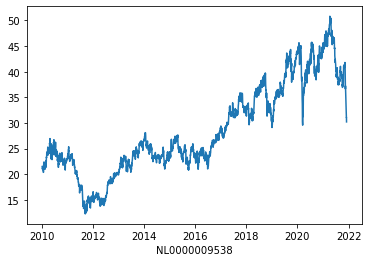

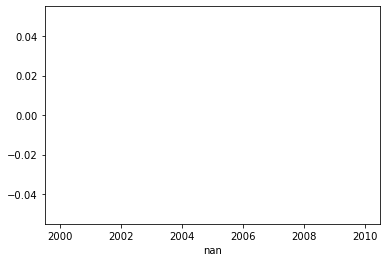

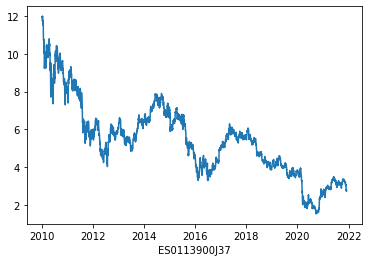

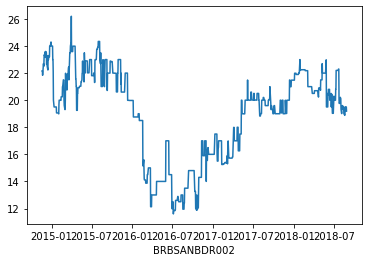

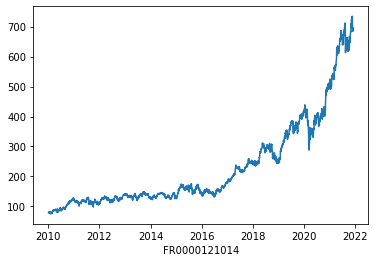

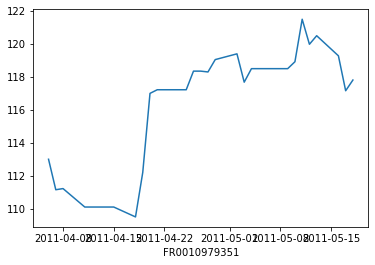

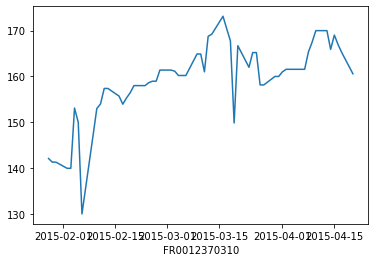

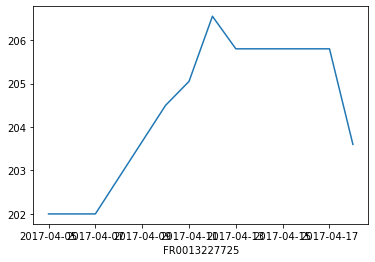

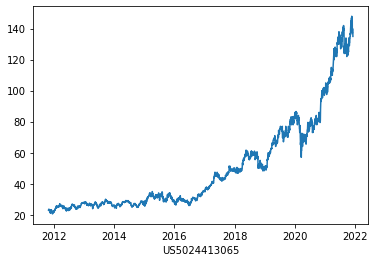

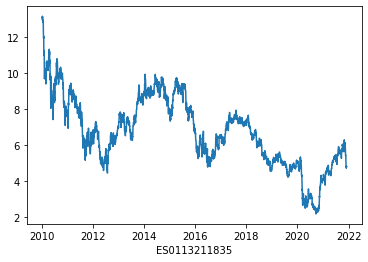

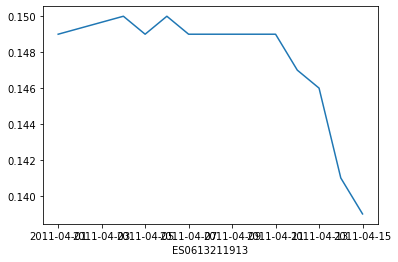

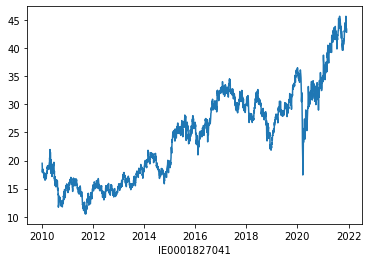

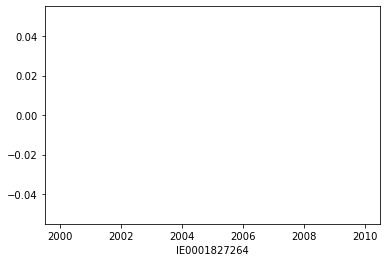

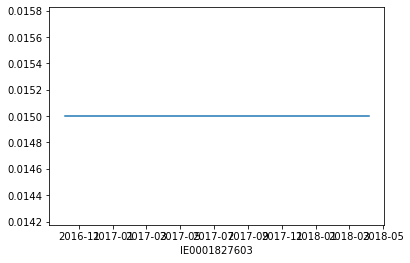

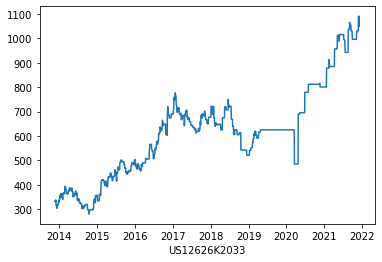

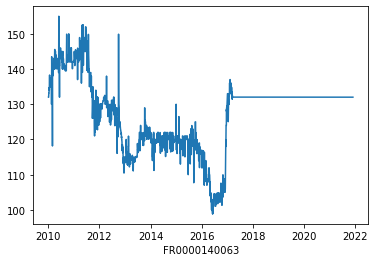

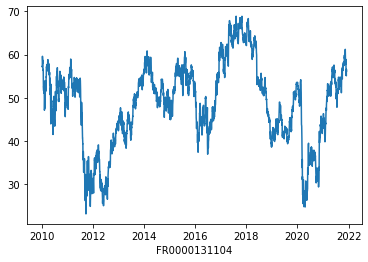

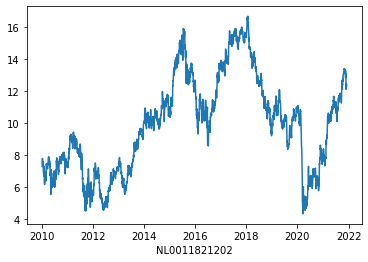

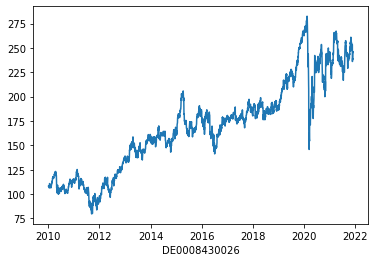

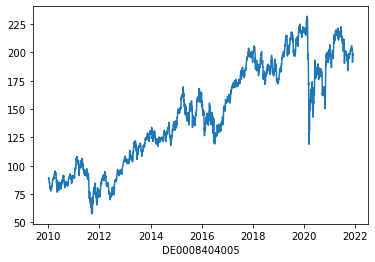

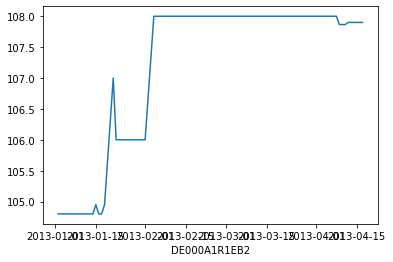

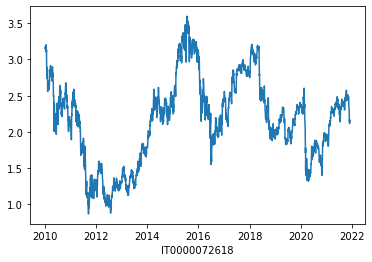

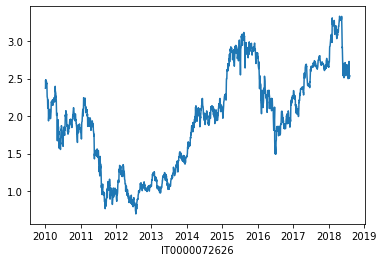

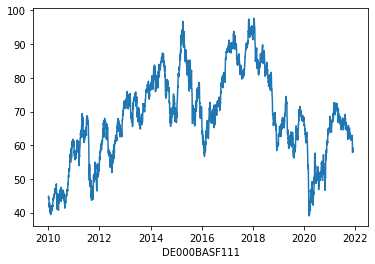

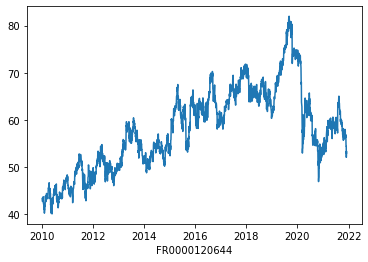

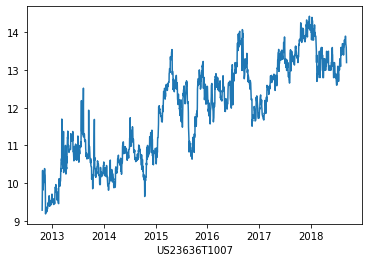

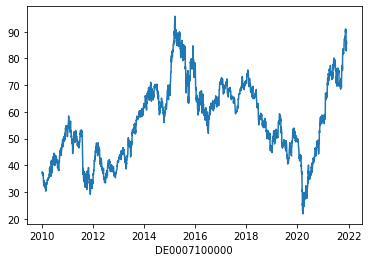

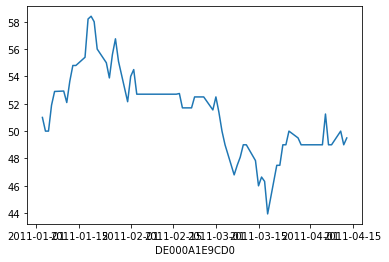

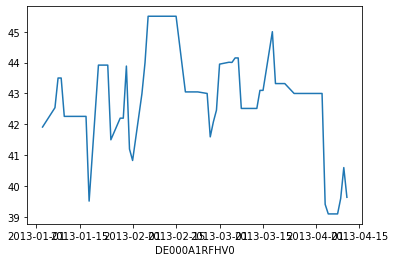

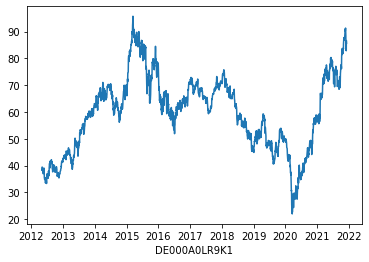

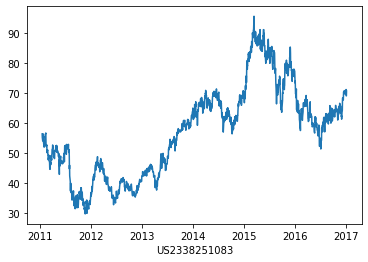

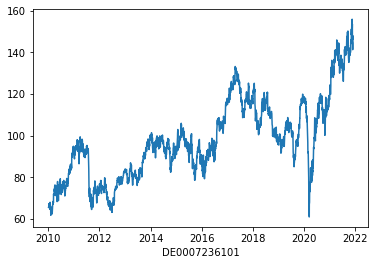

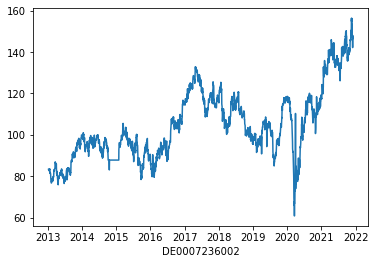

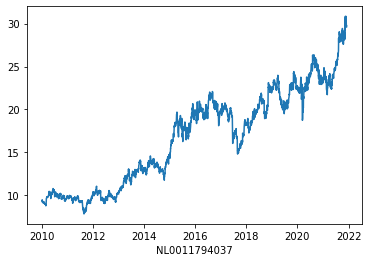

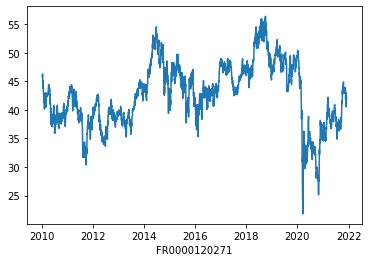

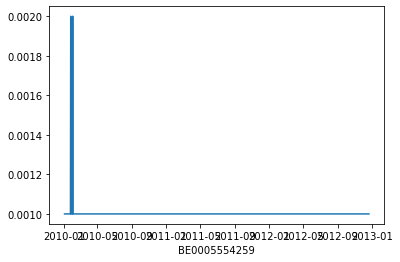

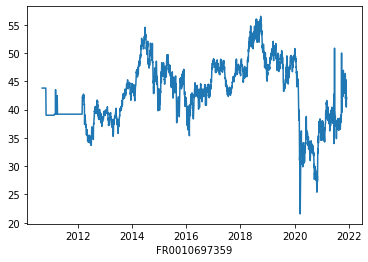

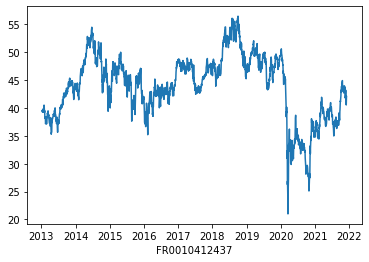

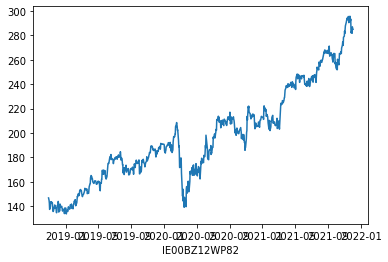

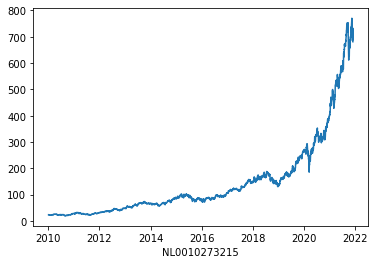

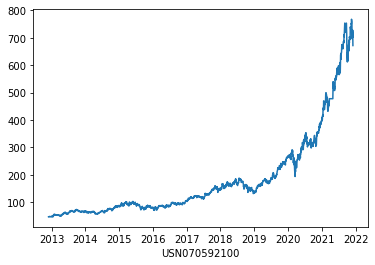

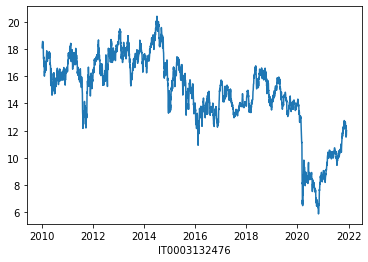

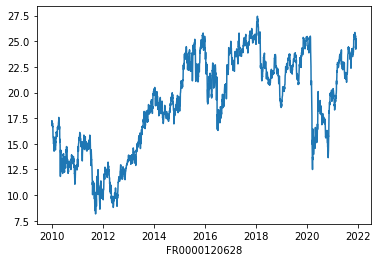

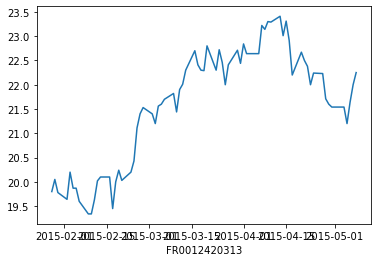

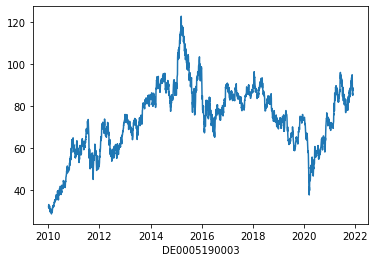

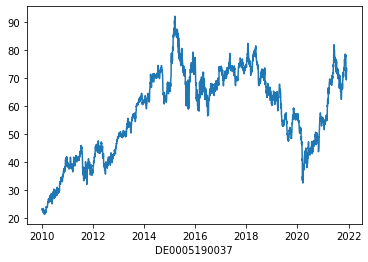

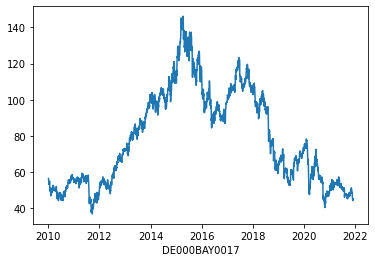

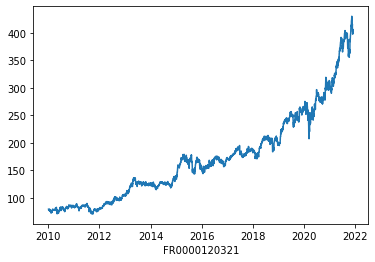

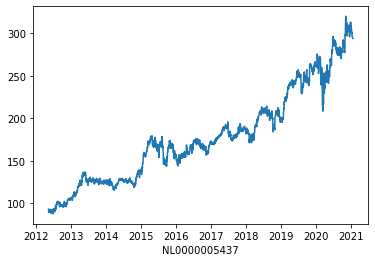

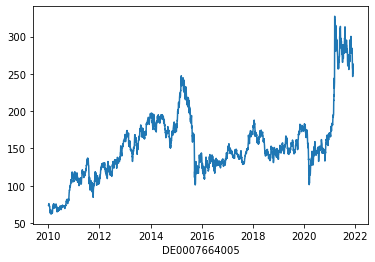

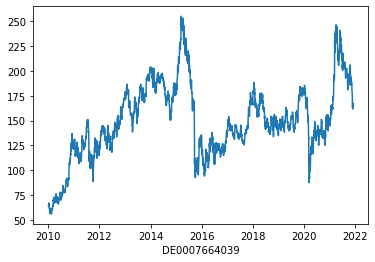

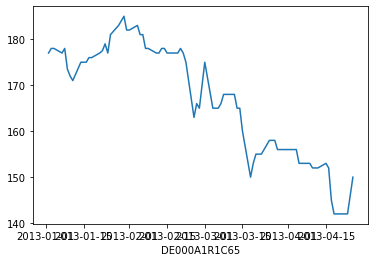

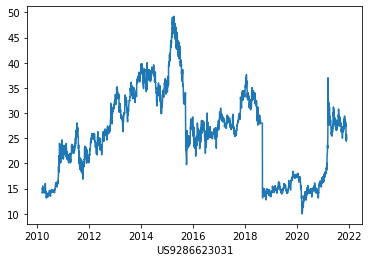

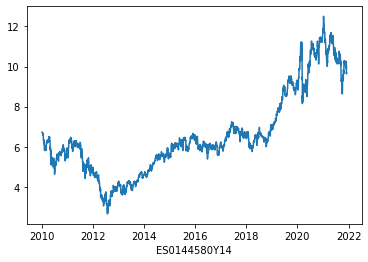

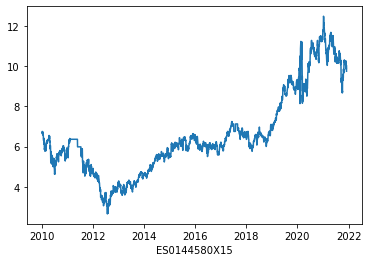

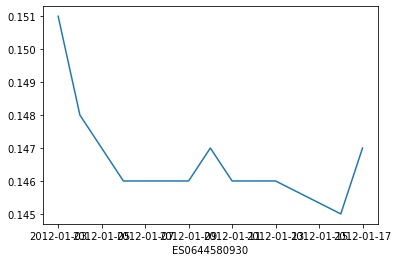

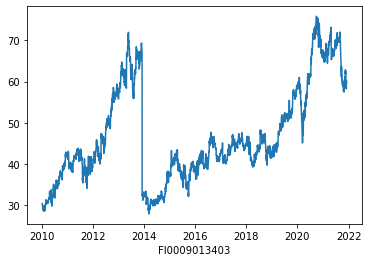

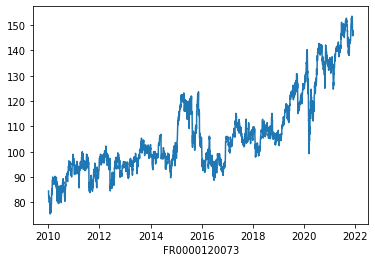

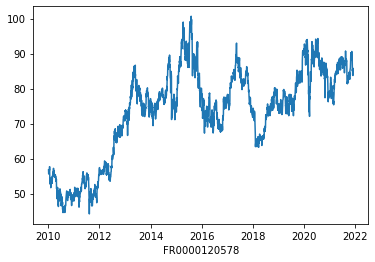

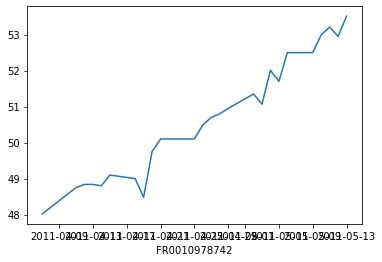

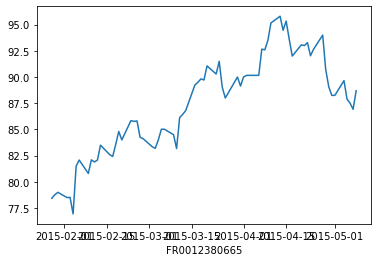

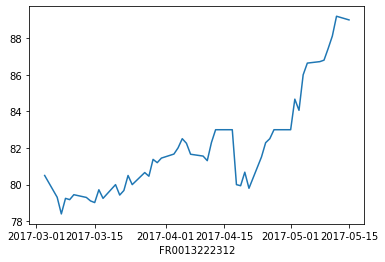

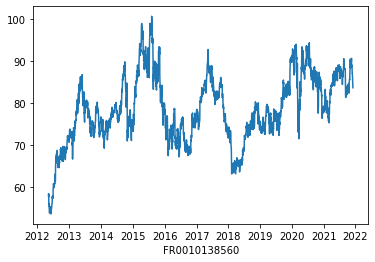

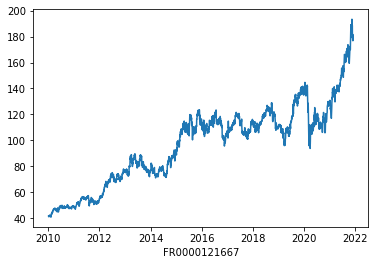

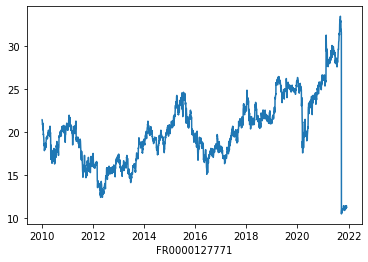

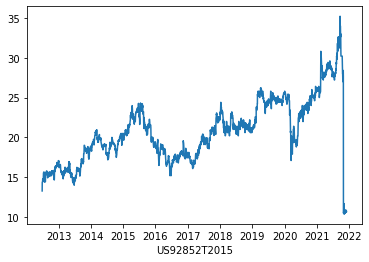

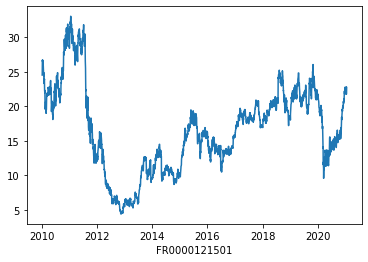

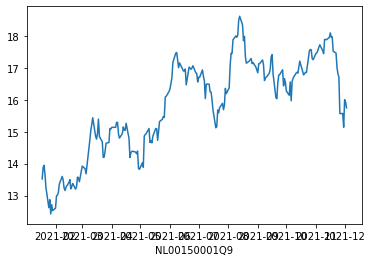

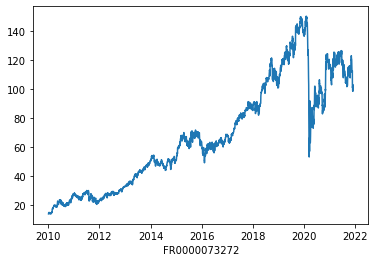

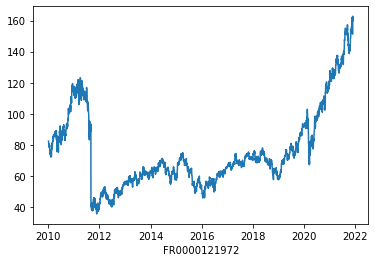

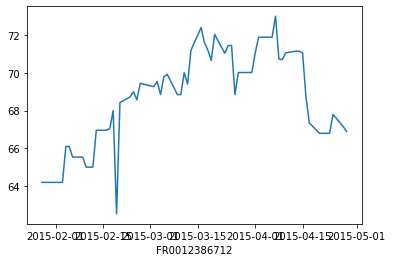

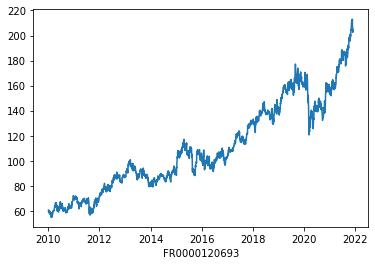

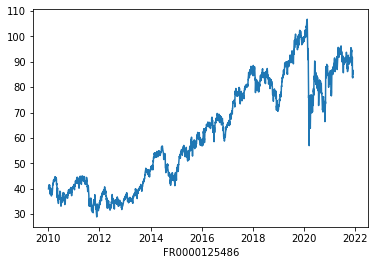

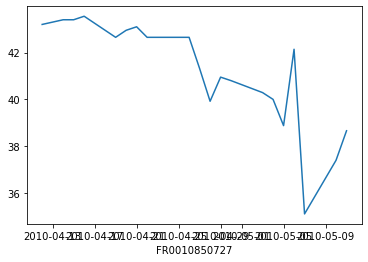

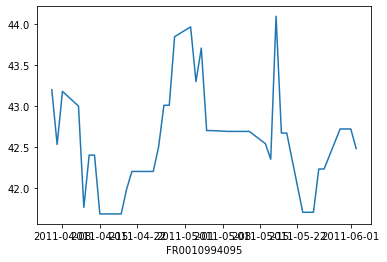

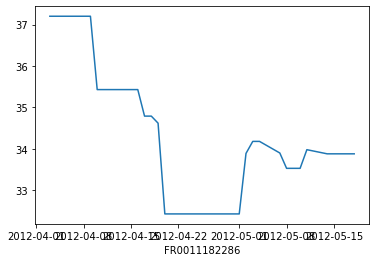

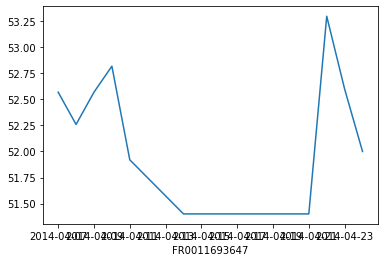

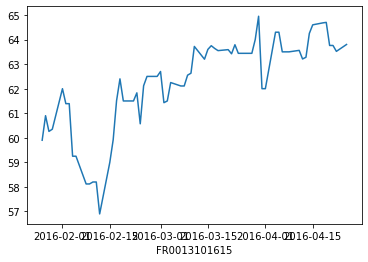

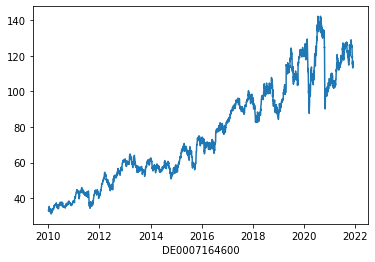

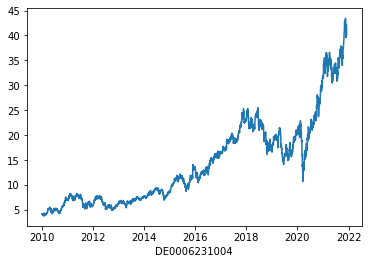

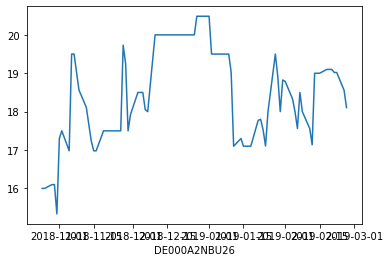

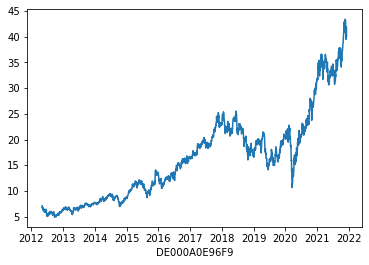

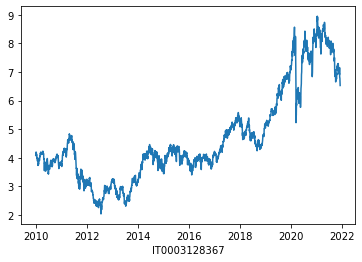

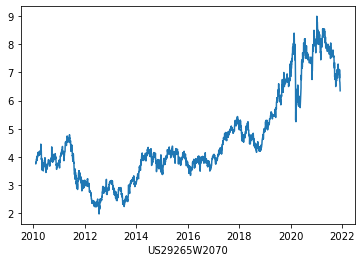

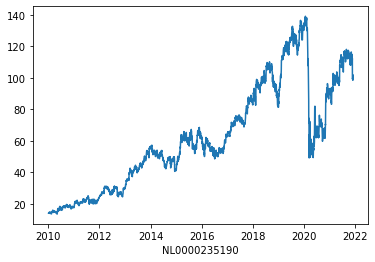

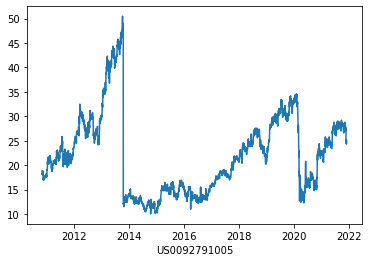

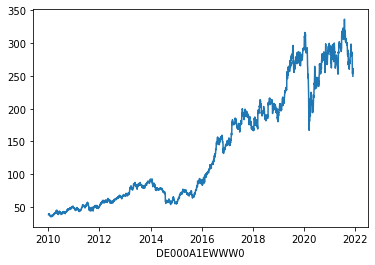

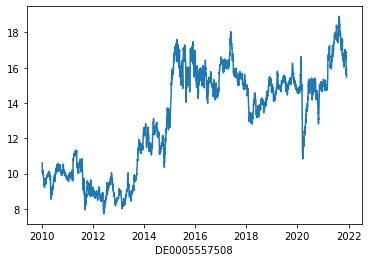

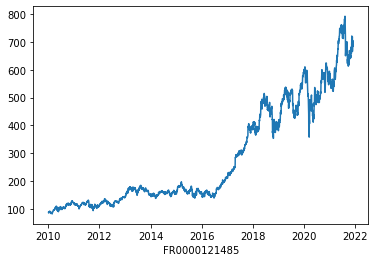

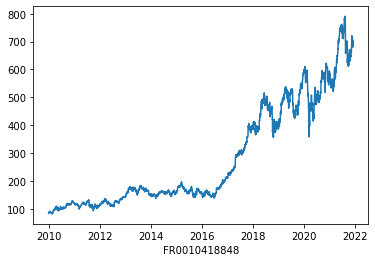

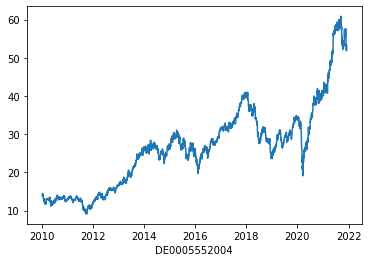

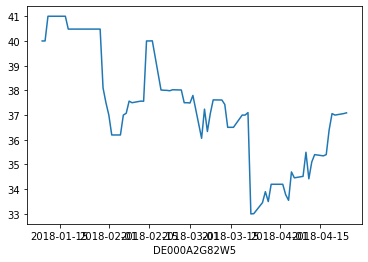

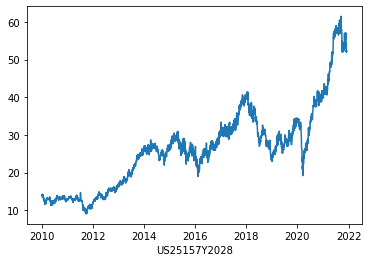

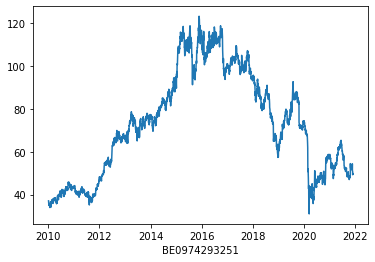

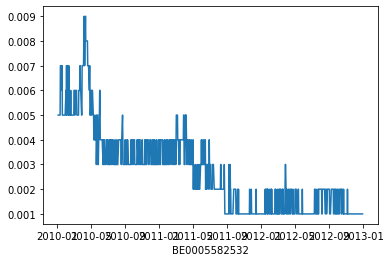

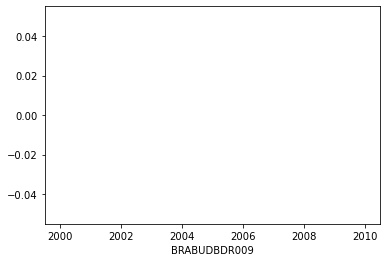

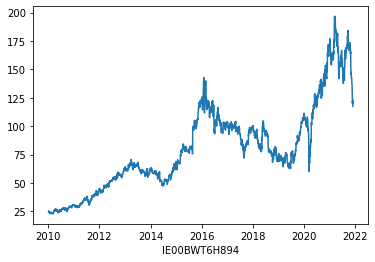

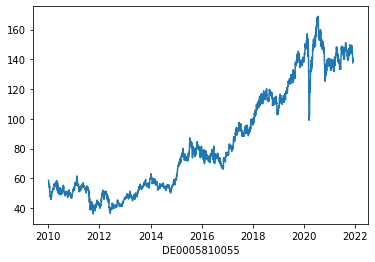

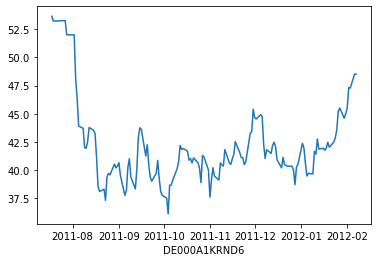

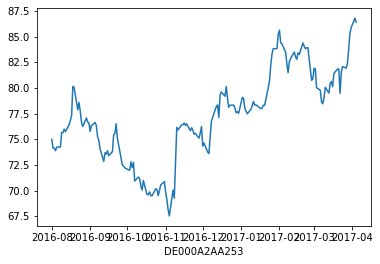

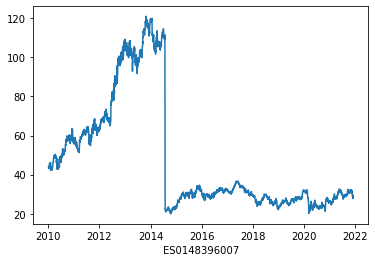

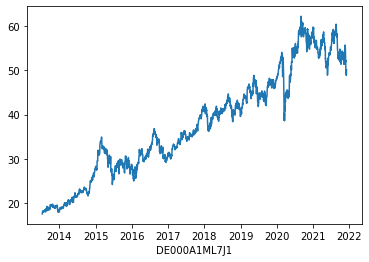

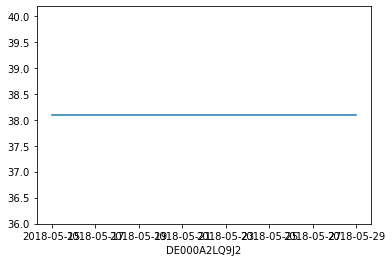

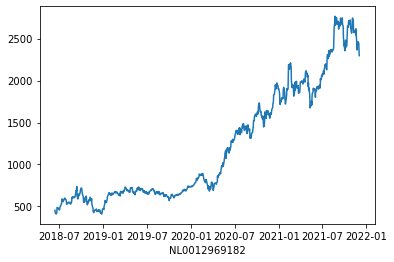

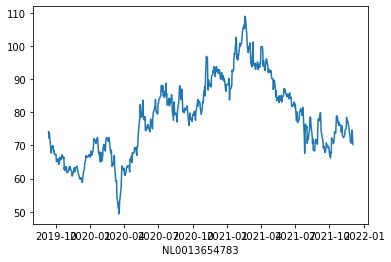

In [18]:
# Closed Price for all conm (len(conm)=51)
for isin in df_es["isin"].unique():
    df=df_es[df_es["isin"]==isin]
    plt.figure()
    plt.plot(df["datadate"], df["prccd"])
    plt.xlabel(isin)
    plt.show()